
<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/6gCsHd6/1200px-Pandas-logo-svg.png width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Data Analysis with Python</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Session - 07</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#4d77cf; font-size:200%; text-align:center; border-radius:10px 10px;">Handling with Missing Values</p>

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [TYPE OF NAN VALUES](#1)
* [DETECTING MISSING VALUES](#2)
* [CONVERTING INAPPROPRIATE VALUES TO NAN VALUES](#3)    
* [MISSING VALUE HANDLING METHODS](#4)    
* [THE END OF THE SESSION - 07](#5)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Libraries Needed in This Notebook</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Once you've installed NumPy & Pandas you can import them as a library:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
id_no = ["P001", "P002", "P003", "P004", "P005", "P006", "P007", "P008", "P009", "P010", "P011"]
gender = ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
status = ["FT", "PT", "-", "FT", "PT", "PT", "FT", "-", "PT", "FT", np.nan]
dept = ["DS", "FS", "AWS", "AWS", "DS", None, "FS", "FS", np.nan, "DS", "AWS"]
V1 = np.array([2, 3, 5, np.nan, 7, 1, np.nan, 10, 14, "-", 6])
V2 = np.array([8, np.nan, 5, 8, 11, np.nan, np.nan, 2, 3, 7, 9])
salary = np.array([np.nan, 54, 59, 120, 58, 75, None, 136, 60, 125, np.nan])

df = pd.DataFrame({
                   "id" : id_no,
                   "gender": gender,
                   "status": status,
                   "dept": dept,
                   "var1" : V1,
                   "var2" : V2,
                   "salary" : salary
                  })
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Type of NaN Values</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [3]:
df.info()  # Önce datayı inceleyelim.

# Ör: status kolonunda 3 tane değer olmayan hücre var. ancak sadece bir tane NaN görüyor. - olanları NaN olarak görmüyor.
# unique değerlere ve value_count lara bakarak verilerin daha detaylı incelenmesi gerekir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(1), object(6)
memory usage: 744.0+ bytes


In [4]:
type(np.nan)  # bunların default tipi float dır.

float

In [5]:
type(np.NaN)

float

In [6]:
type(None)  
# tipi NoneType old. için bazı yerlerde hata almanıza sebep olabilir. Bunları np.nan lara çevirmek gerekebilir.

NoneType

In [7]:
df.salary  
# iki farklı null value (NaN ve None) var. Tür olarak en kapsayıcı hangisi ise serinin türü de o oluyor.

0      NaN
1       54
2       59
3      120
4       58
5       75
6     None
7      136
8       60
9      125
10     NaN
Name: salary, dtype: object

In [8]:
type(df.salary[0])  # Serimizin türü object. Sebebi none içermesi. Ancak 0. elemanının türü float.

float

In [9]:
type(df.salary[6])  # 6. elemanı none olduğu için türü nonetype.

NoneType

In [10]:
type(df.salary[1])  # 1. elemanı int.

int

In [11]:
print(0 * np.nan)
print(np.nan == np.nan)
print(np.inf > np.nan)
print(np.nan - np.nan)
print(np.nan + np.nan)
print(np.nan - 10)
print(np.nan + 10)
print(np.nan in set([np.nan]))
print(0.3 == 3 * 0.1)

nan
False
False
nan
nan
nan
nan
True
False


In [12]:
np.nan is np.nan 

True

In [13]:
df.status  # status kolonunun türü object.

0      FT
1      PT
2       -
3      FT
4      PT
5      PT
6      FT
7       -
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [14]:
type(df.status[2]) # 2. elemanının türü str.

str

In [15]:
type(df.status[10])

# status verileri liste içerisinde df e girdiğinden ve liste içindeki elemanlar kendi dtype larını koruyabildikleri için bu kolondaki nan float kalmıştır.

float

In [16]:
df.var1

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [17]:
type(df.var1[3])  # kolonda bulunan bir str (-) ifadeden dolayı nan ları da str yaptı.

str

In [18]:
type(df.var1[9])

str

**What is the None keyword in Python? [ANSWER01](https://www.educative.io/edpresso/what-is-the-none-keyword-in-python), [ANSWER02](https://stackoverflow.com/questions/21095654/what-is-a-nonetype-object)**

**Difference between None and NaN in Pandas [ANSWER01](https://www.skytowner.com/explore/difference_between_none_and_nan_in_pandas), [ANSWER02](https://kegui.medium.com/what-is-the-difference-between-nan-none-pd-nan-and-np-nan-a8ee0532e2eb)**

**Difference between np.nan and np.NaN [ANSWER](https://stackoverflow.com/questions/53436339/difference-between-np-nan-and-np-nan)**

**Difference between nan and 'nan' in Python [ANSWER01](https://stackoverflow.com/questions/40309789/difference-between-nan-and-nan-in-python), [ANSWER02](https://towardsdatascience.com/navigating-the-hell-of-nans-in-python-71b12558895b)**

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Detecting Missing Values</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``NaN``**, standing for "Not A Number", is a numeric data type used to represent any value that is undefined or unpresentable.

For example, 0/0 is undefined as a real number and is, therefore, represented by NaN. The square root of a negative number is an imaginary number that cannot be represented as a real number, so, it is represented by NaN.

**``NaN``** is also assigned to variables, in a computation, that do not have values and have yet to be computed.

In [19]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [20]:
# df.isnull()
df.isna()  # her ikiside aynı sonucu verir. null değerler için True, olmayanlar için False döndürür.

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [21]:
# df.notnull()
df.notna()  # her ikiside aynı sonucu verir. null olmayan değerler için True, olanlar için False döndürür.

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,True,False,False
7,True,True,True,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,True,True,True


In [22]:
df.isnull().any()  # bir tane bile null varsa True veir.

# status, dept, var2, slary kolonlarında null değer var.

id        False
gender    False
status     True
dept       True
var1      False
var2       True
salary     True
dtype: bool

In [23]:
df.isnull().any(axis=1)  # kolonlar boyunca (Yani bir satırda) null olup olmadığını görmek için axis=1 kullanılır.

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9     False
10     True
dtype: bool

In [24]:
df.isnull().sum()  # her sütunda kaç null değeri old. görmek için sum fonk. kullanılabilir.

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

In [25]:
df.isnull().sum().sum() # veri setinde toplamda kaç null değer olduğunu bulmak için

9

In [26]:
df.salary.isnull()  # salary kolonundaki null değerleri satır satır görebiliriz.

0      True
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10     True
Name: salary, dtype: bool

In [27]:
df.salary.isnull().any()  # salary sütununda bir tane bile null varsa True yoksa False döner.

True

In [28]:
df.salary.isnull().sum()  # salary sütunundaki toplam null değerini bulmak için

3

In [29]:
df.isnull().sum()/len(df)*100 # kolon/sütun bazında oransal olarak null miktarını bulmak için

id         0.000000
gender     0.000000
status     9.090909
dept      18.181818
var1       0.000000
var2      27.272727
salary    27.272727
dtype: float64

In [30]:
df[df.isnull().any(axis=1)]  
# df teki sadece null değer içeren verileri görebilmek için boolean değer döndüren kodu df içine köşeli parantez ile yazarak filtreleme yaptık.

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
8,P009,M,PT,NaN,14,3.0,60
10,P011,M,NaN,AWS,6,9.0,NaN


In [31]:
type(None)

NoneType

In [32]:
df.loc[df.dept.isnull(), "salary"]  # dept değeri null olanların salary'lerini bulmak için

5    75
8    60
Name: salary, dtype: object

In [33]:
df[~df.isnull().any(axis=1)] # null olmayan değer içeren kolonları seçmek için (~ işareti NOT demek)

,id,gender,status,dept,var1,var2,salary
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
7,P008,F,-,FS,10,2.0,136
9,P010,F,FT,DS,-,7.0,125


In [34]:
df.loc[df.dept.isnull()]  # dept değerleri null olan satırları görmek için

,id,gender,status,dept,var1,var2,salary
5,P006,F,PT,None,1,NaN,75
8,P009,M,PT,NaN,14,3.0,60


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Converting Inappropriate Values to NaN Values</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

- map()
- replace()

In [35]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [36]:
df["var1"].map({"-":np.nan})  # Serideki tüm elemanları nan yapar. Biz bunu istemiyoruz.

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
Name: var1, dtype: float64

**Notes:** When **``arg``** parameter is a dictionary, values in Series that are NOT in the dictionary (as keys) are converted to NaN. However, if the dictionary is a dict subclass that defines __missing__ (i.e. provides a method for default values), then this default is used rather than NaN [SOURCE](https://www.w3resource.com/pandas/series/series-map.php#:~:text=The%20map()%20function%20is,a%20dict%20or%20a%20Series.&text=Mapping%20correspondence.&text=If%20'ignore'%2C%20propagate%20NaN,them%20to%20the%20mapping%20correspondence.).

In [37]:
df["var1"].replace(to_replace="-", value=np.nan)  # serimizdeki - olan elemanları nan yapmak için replace metodu kullanılır.

# to_replace parametresine değiştirmek istediğiniz değeri, value parametresine yeni değeri yazmalısınız.
# Ancak veri türüm halen object. Bunun nedei nan olması. Bunu dzüeltmek için type değişimi yapılmalıdır.

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

In [38]:
df["var1"].replace(to_replace="-", value=np.nan).astype("float")  #Serideki elemanların türünü değiştirmek için

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [ ]:
print()

In [ ]:
"rte".to_replace

In [39]:
# 2. yol hem str hem de nan yapma

df["var1"].replace(to_replace=["-", "NaN"], value=np.nan)  # bu şekilde de seri türü obj. olarak kaldı.

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

In [40]:
df["var1"].replace(to_replace=["-", "nan"], value=np.nan).astype("float")

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [41]:
df["var1"] = df["var1"].replace(to_replace="-", value=np.nan).astype("float") 
# astype hata veriyorsa seride hala string ifade vardır.
df.var1

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [42]:
df.status  # Buradaki -'leri NaN' a çevirelim

0      FT
1      PT
2       -
3      FT
4      PT
5      PT
6      FT
7       -
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [43]:
df.status = df.status.replace("-", np.nan)
df.status  # Burada diğer veriler de str old. için Nan lar da str olarak kalabilir. type değişkliğine gerek yok.

0      FT
1      PT
2     NaN
3      FT
4      PT
5      PT
6      FT
7     NaN
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [44]:
df.gender.map({"M":1,"F":0})  # map metodu serideki tüm elemanlara belirttiğimiz değişiklikleri yapar.

0     1
1     0
2     1
3     0
4     1
5     0
6     1
7     0
8     1
9     0
10    1
Name: gender, dtype: int64

In [45]:
df.gender.replace({"M":1,"F":0})  # yukarıda map ile yapılan işlemin aynısını replace metodu ile de yapabilirsiniz.

0     1
1     0
2     1
3     0
4     1
5     0
6     1
7     0
8     1
9     0
10    1
Name: gender, dtype: int64

In [46]:
df["gender"].replace(["M","F"], [1,0])  # replace metodunu içine eski veriler ile yeni verileri liste şeklinde yazarak da kullanabiliriz.

0     1
1     0
2     1
3     0
4     1
5     0
6     1
7     0
8     1
9     0
10    1
Name: gender, dtype: int64

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Missing Value Handling Methods</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

 1. <b>Deleting (Dropping) Rows</b> ----->if it has more than 70-75% of missing values
    
 2. <b>Replacing (Filling) With Mean/Median/Mode (Imputation)</b>--->can be applied on a feature which has numeric data

 3. <b> Assigning An Unique Category</b>--->If a categorical feature has definite number of classes, we can assign another class
    
 4. <b>Predicting The Missing Values</b>---> we can predict the nulls with the help of a machine learning algorithm like linear regression

 5. <b>Using Algorithms Which Support Missing Values</b>--->KNN is a machine learning algorithm which works on the principle of distance measure.  This algorithm can be used when there are nulls present in the dataset.  KNN considers the missing values by taking the majority of the K nearest values

 ## 1 - Dropping
 
 - dropna()
 - drop()

In [47]:
df  # df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [48]:
df.dropna(axis=0, how="any", thresh=None, inplace=False)  # 1 tane bile NaN olan satırları silmek/düşmek için

,id,gender,status,dept,var1,var2,salary
4,P005,M,PT,DS,7.0,11.0,58


In [49]:
df.dropna(axis=1, how="any", thresh=None, inplace=False) # 1 tane bile NaN olan sütunları silmek/düşmek için

,id,gender
0,P001,M
1,P002,F
2,P003,M
3,P004,F
4,P005,M
5,P006,F
6,P007,M
7,P008,F
8,P009,M
9,P010,F


In [50]:
df.dropna(axis=0, how="all", thresh=None, inplace=False)  # verilerinin tamamı NaN olan satırları silmek için

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


* **``any``** : If any NA values are present, drop that row or column.
* **``all``** : If all values are NA, drop that row or column [Source](https://www.journaldev.com/33492/pandas-dropna-drop-null-na-values-from-dataframe).

In [51]:
df["delete_me"]=np.nan

In [52]:
df

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
1,P002,F,PT,FS,3.0,NaN,54,NaN
2,P003,M,NaN,AWS,5.0,5.0,59,NaN
3,P004,F,FT,AWS,NaN,8.0,120,NaN
4,P005,M,PT,DS,7.0,11.0,58,NaN
5,P006,F,PT,None,1.0,NaN,75,NaN
6,P007,M,FT,FS,NaN,NaN,None,NaN
7,P008,F,NaN,FS,10.0,2.0,136,NaN
8,P009,M,PT,NaN,14.0,3.0,60,NaN
9,P010,F,FT,DS,NaN,7.0,125,NaN


In [53]:
df.dropna(axis=1, how="all", thresh=None, inplace=True)  # tüm verileri null olan sütunları silmek için
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


**``thresh=N``** requires that a column has at least N **non-NaNs to survive.** [Source](https://stackoverflow.com/questions/51584906/thresh-in-dropna-for-dataframe-in-pandas-in-python/51584935)

In [54]:
# öncelikli olan thresh dir. all ya da any ye bakmaz.
# thresh: Require that many non-NA values

df.dropna(axis=1, how="all", thresh=9, inplace=False)

# 9'dan fazla null olmayan değer varsa o sütunu tutmak için thresh=9 kullandık.
# Burada all ya da any dikkate alınmaz.
# null olmayan değer sayısı 9'dan az olan sütunlar(axis=1 old. için) silinir.

,id,gender,dept
0,P001,M,DS
1,P002,F,FS
2,P003,M,AWS
3,P004,F,AWS
4,P005,M,DS
5,P006,F,None
6,P007,M,FS
7,P008,F,FS
8,P009,M,NaN
9,P010,F,DS


In [55]:
df.drop([1,3,5])  # 1,3,5. satırları index numarasına göre düşmek için

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
2,P003,M,NaN,AWS,5.0,5.0,59
4,P005,M,PT,DS,7.0,11.0,58
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125
10,P011,M,NaN,AWS,6.0,9.0,NaN


In [56]:
df.drop(["var1","var2"], axis=1)  # var1 ve var2 sütunlarını düşmek için

,id,gender,status,dept,salary
0,P001,M,FT,DS,NaN
1,P002,F,PT,FS,54
2,P003,M,NaN,AWS,59
3,P004,F,FT,AWS,120
4,P005,M,PT,DS,58
5,P006,F,PT,None,75
6,P007,M,FT,FS,None
7,P008,F,NaN,FS,136
8,P009,M,PT,NaN,60
9,P010,F,FT,DS,125


In [57]:
df.drop(columns=["var1","var2"])  # columns parametresi olarak girdiğimizda axis belirtmeye gerek yok.

,id,gender,status,dept,salary
0,P001,M,FT,DS,NaN
1,P002,F,PT,FS,54
2,P003,M,NaN,AWS,59
3,P004,F,FT,AWS,120
4,P005,M,PT,DS,58
5,P006,F,PT,None,75
6,P007,M,FT,FS,None
7,P008,F,NaN,FS,136
8,P009,M,PT,NaN,60
9,P010,F,FT,DS,125


 ## 2 - Filling Missing Values (Imputation)

In [58]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


 #### a.Filling with a specific value

In [59]:
df.fillna(0)  # df teki tüm null değerleri 0 ile doldurmak için

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,0
1,P002,F,PT,FS,3.0,0.0,54
2,P003,M,0,AWS,5.0,5.0,59
3,P004,F,FT,AWS,0.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,0,1.0,0.0,75
6,P007,M,FT,FS,0.0,0.0,0
7,P008,F,0,FS,10.0,2.0,136
8,P009,M,PT,0,14.0,3.0,60
9,P010,F,FT,DS,0.0,7.0,125


In [60]:
df.var1.fillna(0)  # sadece var1 sütunundaki null değerleri 0 ile doldurmak için

0      2.0
1      3.0
2      5.0
3      0.0
4      7.0
5      1.0
6      0.0
7     10.0
8     14.0
9      0.0
10     6.0
Name: var1, dtype: float64

 #### b.Filling with any Proper Value

In [61]:
df.var1.mean()  # var1 sütunundaki null değerleri var1'in ortalaması ile doldurmak için

6.0

In [62]:
df.var1.fillna(df.var1.mean())  # var1 sütunundaki null değerleri var1'in ortalaması ile doldurmak için

0      2.0
1      3.0
2      5.0
3      6.0
4      7.0
5      1.0
6      6.0
7     10.0
8     14.0
9      6.0
10     6.0
Name: var1, dtype: float64

In [63]:
df.mean()

/tmp/ipykernel_13423/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


var1       6.000
var2       6.625
salary    85.875
dtype: float64

In [64]:
df.fillna(df.mean())  # df teki tüm null değerleri karşılık gelen sütunlarının ortalamalası ile doldurmak için. Ancak bu çok kullanılan bir yöntem değildir.

/tmp/ipykernel_13423/661860822.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean())  # df teki tüm null değerleri karşılık gelen sütunlarının ortalamalası ile doldurmak için. Ancak bu çok kullanılan bir yöntem değildir.


,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,85.875
1,P002,F,PT,FS,3.0,6.625,54.000
2,P003,M,NaN,AWS,5.0,5.000,59.000
3,P004,F,FT,AWS,6.0,8.000,120.000
4,P005,M,PT,DS,7.0,11.000,58.000
5,P006,F,PT,None,1.0,6.625,75.000
6,P007,M,FT,FS,6.0,6.625,85.875
7,P008,F,NaN,FS,10.0,2.000,136.000
8,P009,M,PT,NaN,14.0,3.000,60.000
9,P010,F,FT,DS,6.0,7.000,125.000


In [65]:
df.fillna({"dept":"other", "var1":df.var1.mean(), "var2":df.var2.median()})

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,7.5,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,6.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,other,1.0,7.5,75
6,P007,M,FT,FS,6.0,7.5,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,other,14.0,3.0,60
9,P010,F,FT,DS,6.0,7.0,125


**where() Replace values where the condition is False.**

In [66]:
df.notna()

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,False,True,True,True,True
3,True,True,True,True,False,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,False,False,False
7,True,True,False,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,False,True,True


In [67]:
# ÖNEMLİ: where metodu False olan yerlere atama yapar.

df.where(cond=df.notna(), other=df.mean(), axis=1)  # null olan yerleri df. ortalamaları ile doldurmk için

/tmp/ipykernel_13423/1439612821.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.where(cond=df.notna(), other=df.mean(), axis=1)  # null olan yerleri df. ortalamaları ile doldurmk için


,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,85.875
1,P002,F,PT,FS,3.0,6.625,54
2,P003,M,NaN,AWS,5.0,5.000,59
3,P004,F,FT,AWS,6.0,8.000,120
4,P005,M,PT,DS,7.0,11.000,58
5,P006,F,PT,NaN,1.0,6.625,75
6,P007,M,FT,FS,6.0,6.625,85.875
7,P008,F,NaN,FS,10.0,2.000,136
8,P009,M,PT,NaN,14.0,3.000,60
9,P010,F,FT,DS,6.0,7.000,125


In [68]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


**Fill NaN values using an interpolation method.**

In [69]:
df.interpolate()  # sadece sayısal veri içeren kolonlarda interpolate yaparak null değerleri doldurmak için kullanılır

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,6.5,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,6.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,8.0,75
6,P007,M,FT,FS,5.5,5.0,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,10.0,7.0,125


For more information about [interpolation](https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/)

 #### c.Filling the Missing Values of Categorical Variables

In [70]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [71]:
# Kategorik değer içeren verilerin null değerleri mode, ffill, bfill özellikleri kullanılarak doldurulabilir.
df.dept.mode()

# dept kolonunun mode una bakınca üç değer verdi. mode ile null değerleri dolduramayız. Çünkü 3 tane sonuç verdi.

# Bunu çözmek için indexleme yapmalıyız.

0    AWS
1     DS
2     FS
dtype: object

In [72]:
df.dept.fillna(df.dept.mode()[0])

# dept kolonunun mode değerlerinden indexleme ile ilkini seçip, null değerleri seçtiğimiz mode değeri ile doldurabiliriz.

0      DS
1      FS
2     AWS
3     AWS
4      DS
5     AWS
6      FS
7      FS
8     AWS
9      DS
10    AWS
Name: dept, dtype: object

In [73]:
np.random.choice(df.dept.mode())

'DS'

In [74]:
df["dept"].fillna(method="ffill")  # dept kolonundaki null değerleri kendisinden önceki değer ile doldurmak için ffill metodu kullanılır.

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      DS
6      FS
7      FS
8      FS
9      DS
10    AWS
Name: dept, dtype: object

In [75]:
df["dept"].fillna(method="bfill")  # dept kolonundaki null değerleri kendisinden sonraki değer ile doldurmak için bfill metodu kullanılır.

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      FS
6      FS
7      FS
8      DS
9      DS
10    AWS
Name: dept, dtype: object

- **pad / ffill:** propagate last valid observation forward to next valid
- **backfill / bfill:** use next valid observation to fill gap.

 #### d.Filling by condition & by Group of the Categorical Variables 

In [76]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [77]:
df.dept.fillna(method="ffill", inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


**Let's fill the missing values at "status" column with defined condition by "salary"**

In [78]:
df.loc[df["salary"]>=100, "status"]

# maaşı 100 den fazla olanların status'unun çoğunlukla FT old. görülmektedir.
# Bunun için maaşı 100'den fazla olan status'u null olanları FT yapabiliriz.


3     FT
7    NaN
9     FT
Name: status, dtype: object

In [79]:
df.loc[df["salary"]<100, "status"]

# maaşı 100 den düşük olanların status'unun çoğunlukla PT old. görülmektedir.
# Bu nedenle maaşı 100'den düşük olanların null status değerlerini PT yapabiliriz.

1     PT
2    NaN
4     PT
5     PT
8     PT
Name: status, dtype: object

In [80]:
df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0], inplace=True)
df.loc[df["salary"]<100, "status"].fillna(df.loc[df["salary"]<100, "status"].mode()[0], inplace=True)
df  

# ÖNEMLİ: loc ile bu şekilde yapılan işlemlerde inplace çalışmıyor. 

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [81]:
# loc ile inplace çalışmadığı için bunun yerine atama ile değişiklikleri kalıcı hale getirebiliriz.

df.loc[df["salary"]>=100, "status"] = df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0])
df.loc[df["salary"]<100, "status"] = df.loc[df["salary"]<100, "status"].fillna(df.loc[df["salary"]<100, "status"].mode()[0])
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,PT,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,FT,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


**Let's fill the last missing value at "status" column with the mode of the group of "gender" and "dept"**

In [82]:
# status kolonundaki son değerin salary sütununda da NaN değer olduğu için bu satırı yukarıda dolduramadık.
# Bunu doldurmak için gender ve dept'e göre gruplayarak stats mode larını bulalım.
# Bulduğumuz mode değerlerini kullanarak null değerleri dolduralım.

df.groupby(["gender","dept"])["status"].apply(lambda x:x.mode()[0])

gender  dept
F       AWS     FT
        DS      FT
        FS      FT
M       AWS     PT
        DS      FT
        FS      FT
Name: status, dtype: object

In [83]:
df.groupby(["gender","dept"])["status"].transform(lambda x:x.mode()[0])

# Yukarıdaki işlemi transform ile yaptığımda df uzunluğunda bir sonuç elde ederek, 
# null değerleri doldurmak için bu sonucu kullanabilirim.

0     FT
1     FT
2     PT
3     FT
4     FT
5     FT
6     FT
7     FT
8     FT
9     FT
10    PT
Name: status, dtype: object

In [84]:
df["trans_status"] = df.groupby(["gender","dept"])["status"].transform(lambda x:x.mode()[0])
df

,id,gender,status,dept,var1,var2,salary,trans_status
0,P001,M,FT,DS,2.0,8.0,NaN,FT
1,P002,F,PT,FS,3.0,NaN,54,FT
2,P003,M,PT,AWS,5.0,5.0,59,PT
3,P004,F,FT,AWS,NaN,8.0,120,FT
4,P005,M,PT,DS,7.0,11.0,58,FT
5,P006,F,PT,DS,1.0,NaN,75,FT
6,P007,M,FT,FS,NaN,NaN,None,FT
7,P008,F,FT,FS,10.0,2.0,136,FT
8,P009,M,PT,FS,14.0,3.0,60,FT
9,P010,F,FT,DS,NaN,7.0,125,FT


In [85]:
df["status"].fillna(df["trans_status"], inplace=True)  # transform ile oluşturduğum değerleri kullanarak null değerleri doldurmak için
df

,id,gender,status,dept,var1,var2,salary,trans_status
0,P001,M,FT,DS,2.0,8.0,NaN,FT
1,P002,F,PT,FS,3.0,NaN,54,FT
2,P003,M,PT,AWS,5.0,5.0,59,PT
3,P004,F,FT,AWS,NaN,8.0,120,FT
4,P005,M,PT,DS,7.0,11.0,58,FT
5,P006,F,PT,DS,1.0,NaN,75,FT
6,P007,M,FT,FS,NaN,NaN,None,FT
7,P008,F,FT,FS,10.0,2.0,136,FT
8,P009,M,PT,FS,14.0,3.0,60,FT
9,P010,F,FT,DS,NaN,7.0,125,FT


**Let's fill the missing values at "salary" column with the mean of the group of "status" and "dept"**

In [86]:
df.groupby("dept").salary.mean()

# dept. lere göre salary ortalamalarını bulmak için

dept
AWS    89.500000
DS     86.000000
FS     83.333333
Name: salary, dtype: float64

In [87]:
df.groupby(["status","dept"]).salary.mean()

# status ve dept'e göre grupların salary ortalamalarını bulmak için

status  dept
FT      AWS     120.0
        DS      125.0
        FS      136.0
PT      AWS      59.0
        DS       66.5
        FS       57.0
Name: salary, dtype: float64

In [88]:
df.groupby(["status","dept"]).salary.transform("mean")

# status ve dept'e göre grupların salary ortalamalarını df uzunluğuna yaymak (transform yapmak) için

# gruplandırmaya göre bir seri oluşturdu. Bunu kullanarak salary deki null değerleri dolduracağız.

0     125.0
1      57.0
2      59.0
3     120.0
4      66.5
5      66.5
6     136.0
7     136.0
8      57.0
9     125.0
10     59.0
Name: salary, dtype: float64

In [89]:
df["trans_salary"] = df.groupby(["status","dept"]).salary.transform("mean") 
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.0,NaN,FT,125.0
1,P002,F,PT,FS,3.0,NaN,54,FT,57.0
2,P003,M,PT,AWS,5.0,5.0,59,PT,59.0
3,P004,F,FT,AWS,NaN,8.0,120,FT,120.0
4,P005,M,PT,DS,7.0,11.0,58,FT,66.5
5,P006,F,PT,DS,1.0,NaN,75,FT,66.5
6,P007,M,FT,FS,NaN,NaN,None,FT,136.0
7,P008,F,FT,FS,10.0,2.0,136,FT,136.0
8,P009,M,PT,FS,14.0,3.0,60,FT,57.0
9,P010,F,FT,DS,NaN,7.0,125,FT,125.0


In [90]:
df.salary.fillna(df.trans_salary, inplace=True)
df

# salary kolonundaki null değerleri status ve dept'e göre gruplayıp,
# gruplara göre salary ortalamalarını bularak ve transform ederek trans_salary sütununu oluşturduk.
# trans_salary verilerini kullanarak salary sütunundaki null değerleri doldurduk.

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.0,125.0,FT,125.0
1,P002,F,PT,FS,3.0,NaN,54.0,FT,57.0
2,P003,M,PT,AWS,5.0,5.0,59.0,PT,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0,FT,120.0
4,P005,M,PT,DS,7.0,11.0,58.0,FT,66.5
5,P006,F,PT,DS,1.0,NaN,75.0,FT,66.5
6,P007,M,FT,FS,NaN,NaN,136.0,FT,136.0
7,P008,F,FT,FS,10.0,2.0,136.0,FT,136.0
8,P009,M,PT,FS,14.0,3.0,60.0,FT,57.0
9,P010,F,FT,DS,NaN,7.0,125.0,FT,125.0


**Let's fill the missing values at "var1" column with the mean of the group of "gender" and "status"**

In [91]:
df.groupby("gender").var1.mean()

gender
F    4.666667
M    6.800000
Name: var1, dtype: float64

In [92]:
df.groupby(["gender", "status"]).var1.mean()

gender  status
F       FT        10.0
        PT         2.0
M       FT         2.0
        PT         8.0
Name: var1, dtype: float64

In [93]:
df["trans_var1"]= df.groupby(["gender", "status"]).var1.transform("mean")
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary,trans_var1
0,P001,M,FT,DS,2.0,8.0,125.0,FT,125.0,2.0
1,P002,F,PT,FS,3.0,NaN,54.0,FT,57.0,2.0
2,P003,M,PT,AWS,5.0,5.0,59.0,PT,59.0,8.0
3,P004,F,FT,AWS,NaN,8.0,120.0,FT,120.0,10.0
4,P005,M,PT,DS,7.0,11.0,58.0,FT,66.5,8.0
5,P006,F,PT,DS,1.0,NaN,75.0,FT,66.5,2.0
6,P007,M,FT,FS,NaN,NaN,136.0,FT,136.0,2.0
7,P008,F,FT,FS,10.0,2.0,136.0,FT,136.0,10.0
8,P009,M,PT,FS,14.0,3.0,60.0,FT,57.0,8.0
9,P010,F,FT,DS,NaN,7.0,125.0,FT,125.0,10.0


In [94]:
df.var1.fillna(df["trans_var1"], inplace=True)
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary,trans_var1
0,P001,M,FT,DS,2.0,8.0,125.0,FT,125.0,2.0
1,P002,F,PT,FS,3.0,NaN,54.0,FT,57.0,2.0
2,P003,M,PT,AWS,5.0,5.0,59.0,PT,59.0,8.0
3,P004,F,FT,AWS,10.0,8.0,120.0,FT,120.0,10.0
4,P005,M,PT,DS,7.0,11.0,58.0,FT,66.5,8.0
5,P006,F,PT,DS,1.0,NaN,75.0,FT,66.5,2.0
6,P007,M,FT,FS,2.0,NaN,136.0,FT,136.0,2.0
7,P008,F,FT,FS,10.0,2.0,136.0,FT,136.0,10.0
8,P009,M,PT,FS,14.0,3.0,60.0,FT,57.0,8.0
9,P010,F,FT,DS,10.0,7.0,125.0,FT,125.0,10.0


**Let's fill the missing values at "var2" column with the mean of group of "status"**

In [95]:
df.groupby("status").var2.mean()

status
FT    6.25
PT    7.00
Name: var2, dtype: float64

In [96]:
df.groupby("status").var2.transform("mean")

0     6.25
1     7.00
2     7.00
3     6.25
4     7.00
5     7.00
6     6.25
7     6.25
8     7.00
9     6.25
10    7.00
Name: var2, dtype: float64

In [97]:
df.var2.fillna(df.groupby("status").var2.transform("mean"), inplace=True)
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary,trans_var1
0,P001,M,FT,DS,2.0,8.00,125.0,FT,125.0,2.0
1,P002,F,PT,FS,3.0,7.00,54.0,FT,57.0,2.0
2,P003,M,PT,AWS,5.0,5.00,59.0,PT,59.0,8.0
3,P004,F,FT,AWS,10.0,8.00,120.0,FT,120.0,10.0
4,P005,M,PT,DS,7.0,11.00,58.0,FT,66.5,8.0
5,P006,F,PT,DS,1.0,7.00,75.0,FT,66.5,2.0
6,P007,M,FT,FS,2.0,6.25,136.0,FT,136.0,2.0
7,P008,F,FT,FS,10.0,2.00,136.0,FT,136.0,10.0
8,P009,M,PT,FS,14.0,3.00,60.0,FT,57.0,8.0
9,P010,F,FT,DS,10.0,7.00,125.0,FT,125.0,10.0


## filling with Interpolation

Pandas **``dataframe.interpolate()``** function is basically used to fill NA values in the dataframe or series. But, this is a very powerful function to fill the missing values. It uses various interpolation technique to fill the missing values rather than hard-coding the value [Source 01](https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/) & [Source 02](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html)

In [98]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [99]:
flights.info

<bound method DataFrame.info of      year month  passengers
0    1949   Jan         112
1    1949   Feb         118
2    1949   Mar         132
3    1949   Apr         129
4    1949   May         121
..    ...   ...         ...
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432

[144 rows x 3 columns]>

<AxesSubplot:>

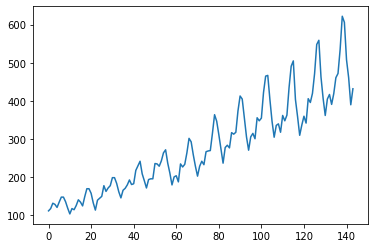

In [100]:
flights.passengers.plot()

In [101]:
flights_copy = flights.copy()

In [102]:
flights_copy.loc[np.random.randint(1,144,20) ,"passengers"]

59     201
72     242
111    348
118    310
134    419
94     271
61     188
39     181
83     278
98     356
45     191
134    419
137    535
9      119
7      148
57     211
114    491
94     271
98     356
9      119
Name: passengers, dtype: int64

In [103]:
flights_copy.loc[np.random.randint(1,144,20) ,"passengers"] = np.nan

In [105]:
flights_copy.isnull().sum()

year           0
month          0
passengers    19
dtype: int64

<AxesSubplot:>

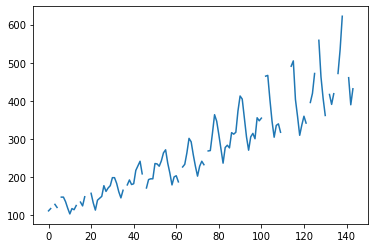

In [106]:
flights_copy.passengers.plot()

<AxesSubplot:>

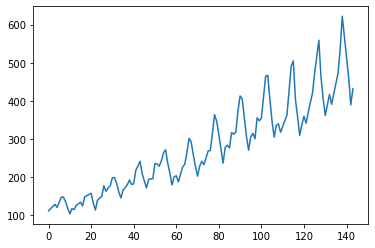

In [107]:
flights_copy.passengers.interpolate().plot()

<AxesSubplot:>

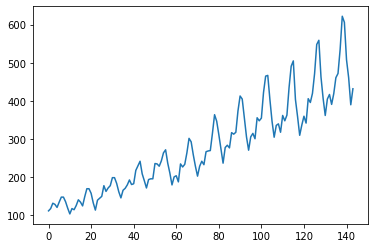

In [108]:
flights.passengers.plot()

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">The End of The Session - 07</p>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

________